<a href="https://colab.research.google.com/github/Aryan-jpg/Major-Project/blob/main/Major_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
from fbprophet import Prophet
df=pd.read_csv('/content/drive/MyDrive/project/major_project_data/covid_19_india.csv')
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1.0,2020-01-30,6:00 PM,Kerala,1,0,0.0,0.0,1.0
1,2.0,2020-01-31,6:00 PM,Kerala,1,0,0.0,0.0,1.0
2,3.0,2020-02-01,6:00 PM,Kerala,2,0,0.0,0.0,2.0
3,4.0,2020-02-02,6:00 PM,Kerala,3,0,0.0,0.0,3.0
4,5.0,2020-02-03,6:00 PM,Kerala,3,0,0.0,0.0,3.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15114 entries, 0 to 15113
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sno                       15086 non-null  float64
 1   Date                      15086 non-null  object 
 2   Time                      15086 non-null  object 
 3   State/UnionTerritory      15086 non-null  object 
 4   ConfirmedIndianNational   15086 non-null  object 
 5   ConfirmedForeignNational  15086 non-null  object 
 6   Cured                     15086 non-null  float64
 7   Deaths                    15086 non-null  float64
 8   Confirmed                 15086 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.0+ MB


In [3]:
df.describe()

,Sno,Cured,Deaths,Confirmed
count,15086.000000,1.508600e+04,15086.000000,1.508600e+04
mean,7543.500000,1.747937e+05,2721.084449,1.942820e+05
std,4355.097416,3.648330e+05,7182.672358,4.095184e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,3772.250000,1.685000e+03,12.000000,2.935500e+03
50%,7543.500000,1.964700e+04,364.000000,2.608150e+04
75%,11314.750000,2.087552e+05,2170.000000,2.216012e+05
max,15086.000000,4.927480e+06,83777.000000,5.433506e+06


In [4]:
df.isnull()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
15109,True,True,True,True,True,True,True,True,True
15110,True,True,True,True,True,True,True,True,True
15111,True,True,True,True,True,True,True,True,True
15112,True,True,True,True,True,True,True,True,True


In [5]:
df.columns

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')

In [6]:
df1=df.copy()

In [7]:
df1.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1.0,2020-01-30,6:00 PM,Kerala,1,0,0.0,0.0,1.0
1,2.0,2020-01-31,6:00 PM,Kerala,1,0,0.0,0.0,1.0
2,3.0,2020-02-01,6:00 PM,Kerala,2,0,0.0,0.0,2.0
3,4.0,2020-02-02,6:00 PM,Kerala,3,0,0.0,0.0,3.0
4,5.0,2020-02-03,6:00 PM,Kerala,3,0,0.0,0.0,3.0


In [8]:
df1.columns=df1.columns.str.lower()

In [9]:
df1.columns

Index(['sno', 'date', 'time', 'state/unionterritory',
       'confirmedindiannational', 'confirmedforeignnational', 'cured',
       'deaths', 'confirmed'],
      dtype='object')

In [10]:
df1.head()

,sno,date,time,state/unionterritory,confirmedindiannational,confirmedforeignnational,cured,deaths,confirmed
0,1.0,2020-01-30,6:00 PM,Kerala,1,0,0.0,0.0,1.0
1,2.0,2020-01-31,6:00 PM,Kerala,1,0,0.0,0.0,1.0
2,3.0,2020-02-01,6:00 PM,Kerala,2,0,0.0,0.0,2.0
3,4.0,2020-02-02,6:00 PM,Kerala,3,0,0.0,0.0,3.0
4,5.0,2020-02-03,6:00 PM,Kerala,3,0,0.0,0.0,3.0


In [11]:
df1.shape

(15114, 9)

In [12]:
df1.isnull().sum()

sno                         28
date                        28
time                        28
state/unionterritory        28
confirmedindiannational     28
confirmedforeignnational    28
cured                       28
deaths                      28
confirmed                   28
dtype: int64

In [13]:
df1.tail()

,sno,date,time,state/unionterritory,confirmedindiannational,confirmedforeignnational,cured,deaths,confirmed
15109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df1=df1.rename(columns={'state/unionterritory':'state','confirmedindiannational':'conf_indian_national','confirmedforeignnational':'conf_foreign_national','confirmed':'total_conf'})

In [15]:
df1.head()

,sno,date,time,state,conf_indian_national,conf_foreign_national,cured,deaths,total_conf
0,1.0,2020-01-30,6:00 PM,Kerala,1,0,0.0,0.0,1.0
1,2.0,2020-01-31,6:00 PM,Kerala,1,0,0.0,0.0,1.0
2,3.0,2020-02-01,6:00 PM,Kerala,2,0,0.0,0.0,2.0
3,4.0,2020-02-02,6:00 PM,Kerala,3,0,0.0,0.0,3.0
4,5.0,2020-02-03,6:00 PM,Kerala,3,0,0.0,0.0,3.0


In [16]:
##################################################
test_df=df1.copy()
test_df.head()

,sno,date,time,state,conf_indian_national,conf_foreign_national,cured,deaths,total_conf
0,1.0,2020-01-30,6:00 PM,Kerala,1,0,0.0,0.0,1.0
1,2.0,2020-01-31,6:00 PM,Kerala,1,0,0.0,0.0,1.0
2,3.0,2020-02-01,6:00 PM,Kerala,2,0,0.0,0.0,2.0
3,4.0,2020-02-02,6:00 PM,Kerala,3,0,0.0,0.0,3.0
4,5.0,2020-02-03,6:00 PM,Kerala,3,0,0.0,0.0,3.0


In [17]:
df1.drop(columns=['sno','time'],inplace=True)
df1.head()

,date,state,conf_indian_national,conf_foreign_national,cured,deaths,total_conf
0,2020-01-30,Kerala,1,0,0.0,0.0,1.0
1,2020-01-31,Kerala,1,0,0.0,0.0,1.0
2,2020-02-01,Kerala,2,0,0.0,0.0,2.0
3,2020-02-02,Kerala,3,0,0.0,0.0,3.0
4,2020-02-03,Kerala,3,0,0.0,0.0,3.0


In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15114 entries, 0 to 15113
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   15086 non-null  object 
 1   state                  15086 non-null  object 
 2   conf_indian_national   15086 non-null  object 
 3   conf_foreign_national  15086 non-null  object 
 4   cured                  15086 non-null  float64
 5   deaths                 15086 non-null  float64
 6   total_conf             15086 non-null  float64
dtypes: float64(3), object(4)
memory usage: 826.7+ KB


In [19]:
r=df1['conf_foreign_national'].unique()
s=df1['conf_indian_national'].unique()

In [20]:
r

array(['0', '1', '2', '14', '3', '9', '7', '11', '10', '8', '6', '-', nan],
      dtype=object)

In [21]:
s

array(['1', '2', '3', '0', '6', '7', '8', '9', '4', '15', '5', '17', '10',
       '11', '19', '14', '22', '32', '12', '23', '24', '36', '25', '39',
       '44', '18', '16', '26', '49', '33', '60', '13', '28', '45', '64',
       '21', '29', '71', '30', '37', '87', '86', '41', '101', '125', '34',
       '35', '42', '55', '110', '20', '121', '40', '129', '127', '38',
       '168', '177', '52', '46', '54', '-', nan], dtype=object)

In [22]:
df1['conf_foreign_national'].value_counts()
#since most of the data is not available hence we drop this colummn

-     14640
0       314
1        39
2        36
14       25
3        12
10        6
8         5
7         3
6         3
11        2
9         1
Name: conf_foreign_national, dtype: int64

In [23]:
df1['conf_indian_national'].value_counts()
#since most of the data is not available hence we drop this colummn

-      14640
1        108
3         73
2         33
4         21
       ...  
125        1
101        1
177        1
45         1
86         1
Name: conf_indian_national, Length: 62, dtype: int64

In [24]:
df1.drop(columns=['conf_indian_national','conf_foreign_national'],inplace=True)
df1.head()

,date,state,cured,deaths,total_conf
0,2020-01-30,Kerala,0.0,0.0,1.0
1,2020-01-31,Kerala,0.0,0.0,1.0
2,2020-02-01,Kerala,0.0,0.0,2.0
3,2020-02-02,Kerala,0.0,0.0,3.0
4,2020-02-03,Kerala,0.0,0.0,3.0


In [25]:
df1.isnull().sum()


date          28
state         28
cured         28
deaths        28
total_conf    28
dtype: int64

In [26]:
df2=df1.dropna(how='all')


In [27]:
df2.isnull().sum()
#all null/NA values are removed from the dataset

date          0
state         0
cured         0
deaths        0
total_conf    0
dtype: int64

In [28]:
#converting the data to a desired datatype
df2['total_conf']=df2['total_conf'].astype(int)
df2['deaths']=df2['deaths'].astype(int)
df2['cured']=df2['cured'].astype(int)
df2['date'] = pd.to_datetime(df2['date'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [29]:
df2.head()

,date,state,cured,deaths,total_conf
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15086 entries, 0 to 15085
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        15086 non-null  datetime64[ns]
 1   state       15086 non-null  object        
 2   cured       15086 non-null  int64         
 3   deaths      15086 non-null  int64         
 4   total_conf  15086 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 707.2+ KB


In [31]:
df2['state'].value_counts()

Kerala                                      476
Delhi                                       444
Rajasthan                                   443
Haryana                                     442
Uttar Pradesh                               442
Ladakh                                      439
Tamil Nadu                                  439
Punjab                                      437
Karnataka                                   437
Jammu and Kashmir                           437
Maharashtra                                 437
Andhra Pradesh                              434
Uttarakhand                                 431
Odisha                                      430
Puducherry                                  428
West Bengal                                 428
Chhattisgarh                                427
Chandigarh                                  427
Gujarat                                     426
Telengana                                   426
Himachal Pradesh                        

In [32]:
df3=df2[df2['date']==df2['date'].max()].copy()
df3.reset_index(drop=True,inplace=True)
df3.head()

,date,state,cured,deaths,total_conf
0,2021-05-19,Andaman and Nicobar Islands,6359,92,6674
1,2021-05-19,Andhra Pradesh,1254291,9580,1475372
2,2021-05-19,Arunachal Pradesh,19977,88,22462
3,2021-05-19,Assam,290774,2344,340858
4,2021-05-19,Bihar,595377,4039,664115


In [33]:
#data for tableau
df2.to_excel('filtered_covid_tableau.xlsx',index=False)#all the data with all previous data for each date.
df3.to_excel('Covid-19_tableau.xlsx',index=False)#this data has the total amount of cured,deaths,cases of covid for the latest date.

In [34]:
df_main=df2.copy()
df_main.head()

,date,state,cured,deaths,total_conf
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [35]:
df_main['state'].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Lakshadweep', 'Telangana'], dtype=object)

In [36]:
df1_main=df_main.drop(df_main[(df_main['state']=='Unassigned')|(df_main['state']=='Cases being reassigned to states')].index,axis=0)


In [37]:
(df1_main['state']=='Cases being reassigned to states').value_counts()

False    15023
Name: state, dtype: int64

In [38]:
#To get the data for all cured people in india for all date.
dates=list(df1_main['date'].unique())
c1=list()
for i in dates:
  a1=df1_main[df1_main['date']==i]['cured'].sum()
  c1.append(a1)
x1=zip(dates,c1)
z1=dict(x1)
new_cured_df=pd.DataFrame(data=list(z1.items()),columns = ['date','cured'])
new_cured_df.tail()

,date,cured
471,2021-05-15,20432898
472,2021-05-16,20795335
473,2021-05-17,21174076
474,2021-05-18,21596512
475,2021-05-19,21986363


In [39]:
#####################################
#Alternate way:
alt=df1_main.groupby(['date']).sum()[['cured','deaths','total_conf']]
alt=alt.reset_index()
alt.head()


,date,cured,deaths,total_conf
0,2020-01-30,0,0,1
1,2020-01-31,0,0,1
2,2020-02-01,0,0,2
3,2020-02-02,0,0,3
4,2020-02-03,0,0,3


In [40]:
alt_1=alt['date']
alt_1.head()

0   2020-01-30
1   2020-01-31
2   2020-02-01
3   2020-02-02
4   2020-02-03
Name: date, dtype: datetime64[ns]

In [41]:
#this diff() is used to get the difference of the values row wise(default axis=0 for pd.diff())
#this is done because the data is in cumulative manner so to get new cases per day we take diff().
alt1=alt.diff()
alt1.tail()
alt_2=alt1[['cured','deaths','total_conf']]
alt_2=alt_2.dropna()
alt_2.tail()

,cured,deaths,total_conf
471,353299.0,3890.0,326098.0
472,362437.0,4077.0,311170.0
473,378741.0,4106.0,281386.0
474,422436.0,4329.0,263533.0
475,389851.0,4529.0,267334.0


In [42]:
#to join both the dataframe together(axis=1 so that the dataframe is joined columns wise).
yo=pd.concat([alt_1, alt_2], axis=1, ignore_index=True)
yo=yo.dropna()
yo.tail()

,0,1,2,3
471,2021-05-15,353299.0,3890.0,326098.0
472,2021-05-16,362437.0,4077.0,311170.0
473,2021-05-17,378741.0,4106.0,281386.0
474,2021-05-18,422436.0,4329.0,263533.0
475,2021-05-19,389851.0,4529.0,267334.0


In [43]:
alt4=yo.copy()
alt5=yo.copy()

In [44]:
alt3=yo.rename(columns={0:'ds',1:'cured',2:'deaths',3:'y'})
alt3.tail()

,ds,cured,deaths,y
471,2021-05-15,353299.0,3890.0,326098.0
472,2021-05-16,362437.0,4077.0,311170.0
473,2021-05-17,378741.0,4106.0,281386.0
474,2021-05-18,422436.0,4329.0,263533.0
475,2021-05-19,389851.0,4529.0,267334.0


In [45]:
alt4=alt4.rename(columns={0:'ds',1:'y',2:'deaths',3:'total_conf'})
alt4.tail()

,ds,y,deaths,total_conf
471,2021-05-15,353299.0,3890.0,326098.0
472,2021-05-16,362437.0,4077.0,311170.0
473,2021-05-17,378741.0,4106.0,281386.0
474,2021-05-18,422436.0,4329.0,263533.0
475,2021-05-19,389851.0,4529.0,267334.0


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


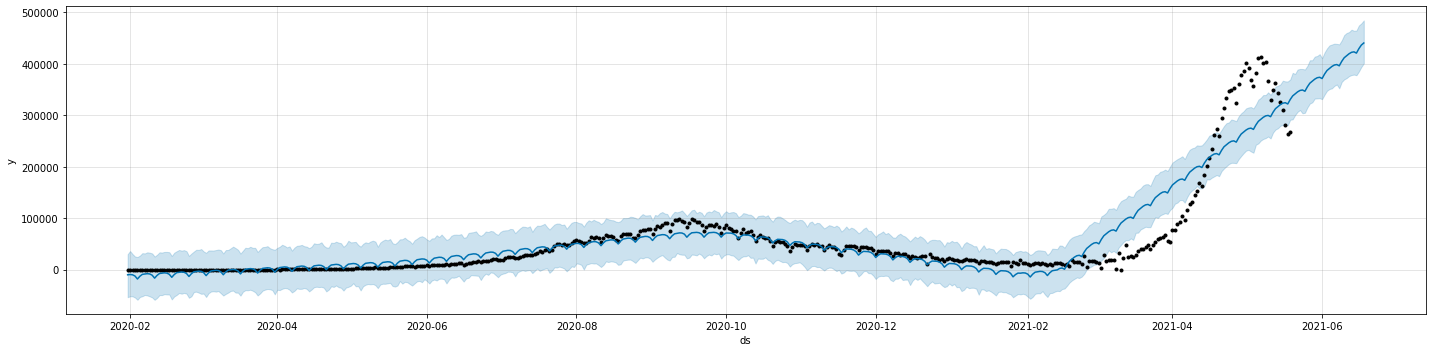

In [46]:
#forecast for the total number of (NEW) active Covid-19 cases per day in India.(non-cumulative data)
alt3_model=Prophet()
alt3_model.fit(alt3)
data_set_alt3=alt3_model.make_future_dataframe(periods=30,freq='D')
main1_forecast_alt3=alt3_model.predict(data_set_alt3)
main_forecast_df_alt3=main1_forecast_alt3[['yhat','yhat_lower','yhat_upper','trend','ds']]
alt3_model.plot(main1_forecast_alt3,figsize=(20,5));
#################################################

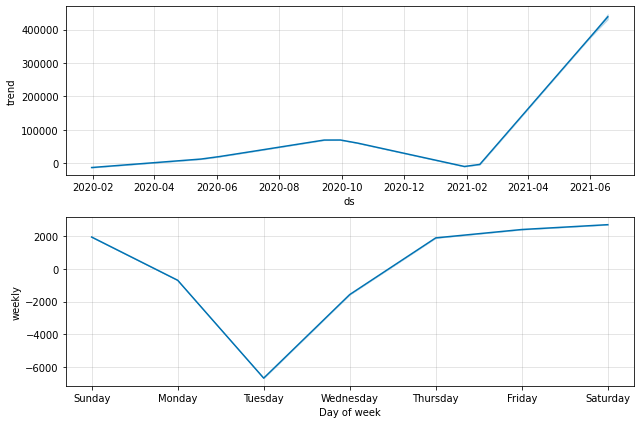

In [47]:
plot_3=alt3_model.plot_components(main1_forecast_alt3)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


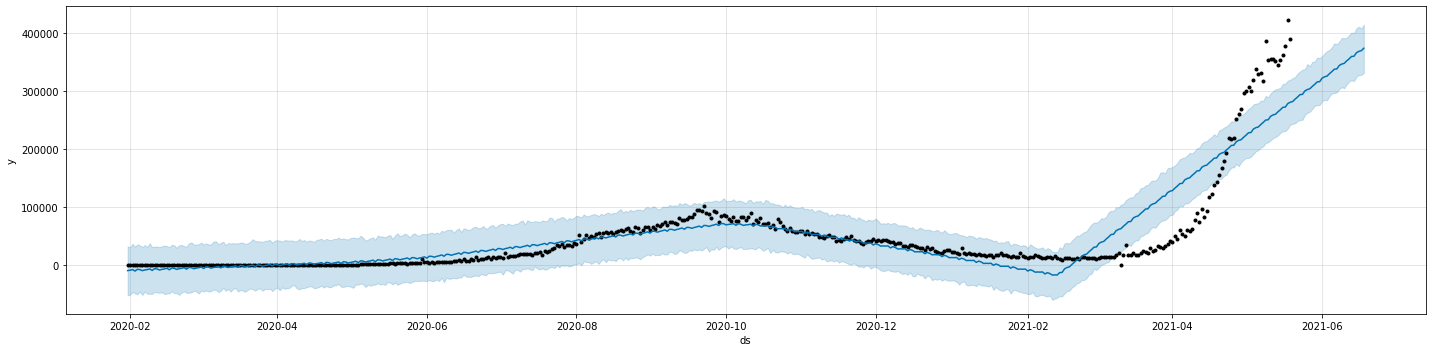

In [48]:
#forecast for the total number of (NEW) cured Covid-19 cases per day in India.(non-cumulative data)
alt4_model=Prophet()
alt4_model.fit(alt4)
data_set_alt4=alt4_model.make_future_dataframe(periods=30,freq='D')
main_forecast_alt4=alt4_model.predict(data_set_alt4)
main_forecast_df_alt4=main_forecast_alt4[['yhat','yhat_lower','yhat_upper','trend','ds']]
alt4_model.plot(main_forecast_alt4,figsize=(20,5));
#################################################

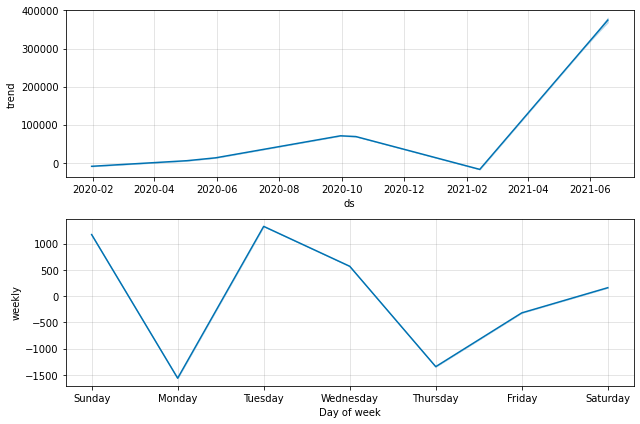

In [49]:
plot_2=alt4_model.plot_components(main_forecast_alt4)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


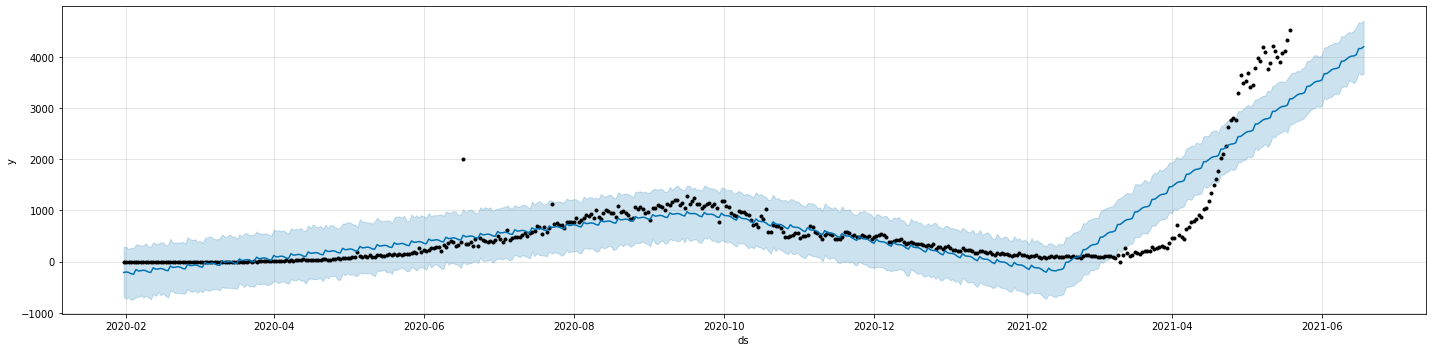

In [50]:
alt5=alt5.rename(columns={0:'ds',1:'cured',2:'y',3:'total_conf'})
#forecast for the total number of (NEW) deaths due to Covid-19 per day in India.(non-cumulative data)
alt5_model=Prophet()
alt5_model.fit(alt5)
data_set_alt5=alt5_model.make_future_dataframe(periods=30,freq='D')
main_forecast_alt5=alt5_model.predict(data_set_alt5)
main_forecast_df_alt5=main_forecast_alt5[['yhat','yhat_lower','yhat_upper','trend','ds']]
alt5_model.plot(main_forecast_alt5,figsize=(20,5));
#################################################

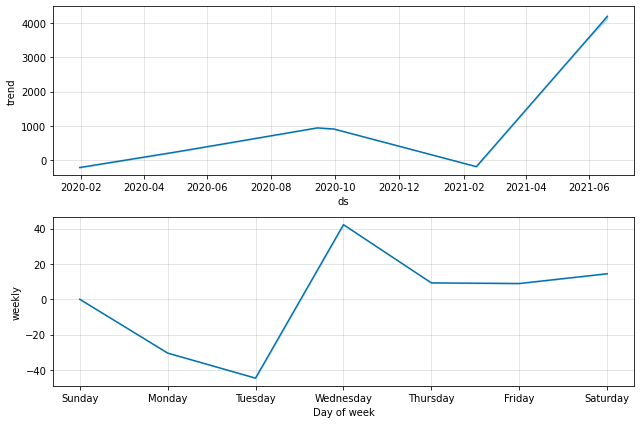

In [51]:
plot=alt5_model.plot_components(main_forecast_alt5)

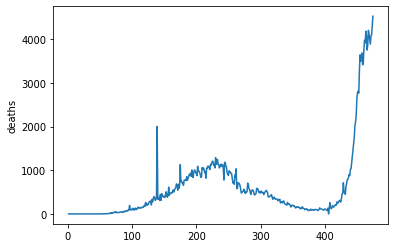

In [52]:
sns.lineplot(x=alt1.index,y=alt1['deaths'],data=alt1)


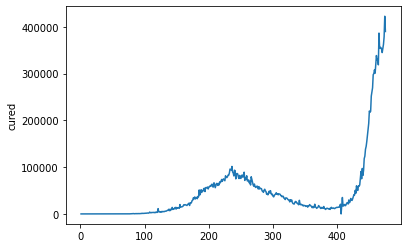

In [53]:
sns.lineplot(x=alt1.index,y=alt1['cured'],data=alt1)

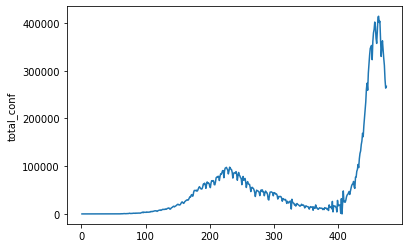

In [54]:
sns.lineplot(x=alt1.index,y=alt1['total_conf'],data=alt1)

In [55]:
###################################################################

In [56]:
new_cured_df.rename(columns={'date':'ds','cured':'y'},inplace=True)
new_cured_df.columns


Index(['ds', 'y'], dtype='object')

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


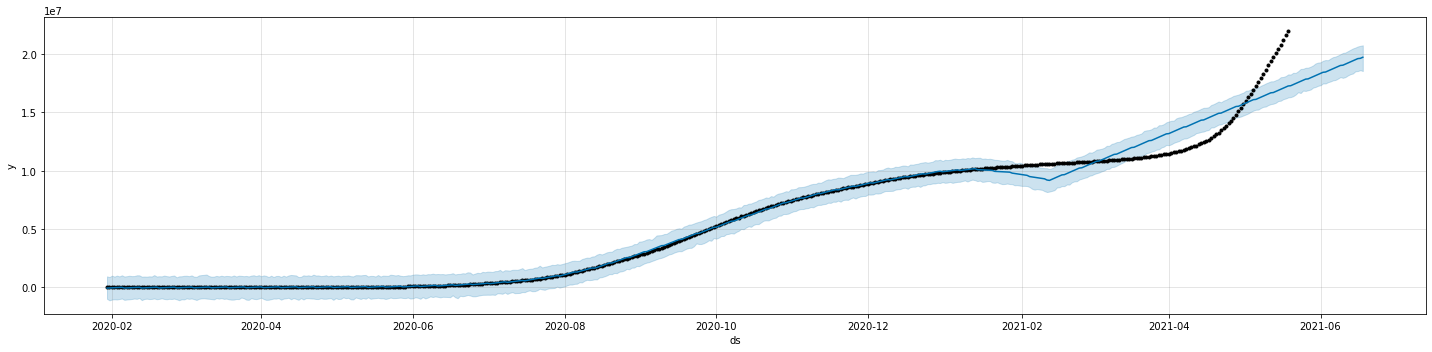

In [57]:
#Forecast for total number of cured people for the next 30 days.(cumulative data as per dataset) 
main_model0=Prophet(changepoint_prior_scale=0.2)
main_model0.fit(new_cured_df)
data_set0=main_model0.make_future_dataframe(periods=30,freq='D')
main1_forecast0=main_model0.predict(data_set0)
main_forecast_df0=main1_forecast0[['yhat','yhat_lower','yhat_upper','trend','ds']]
main_model0.plot(main1_forecast0,figsize=(20,5));

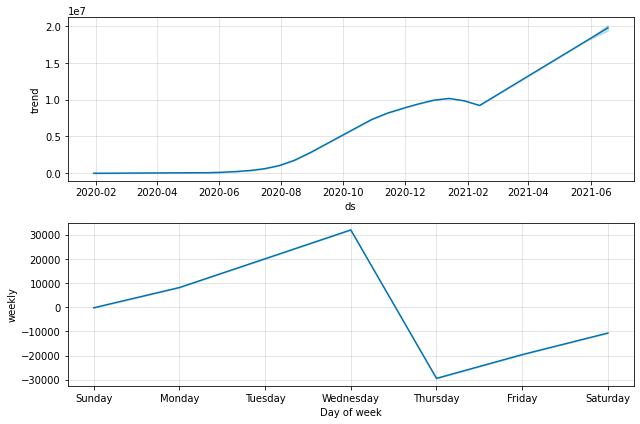

In [58]:
plot0=main_model0.plot_components(main1_forecast0)

In [59]:
#This code is get the total confirmed covid-19 cases in India on that particular date.
date=list(df1_main['date'].unique())
c=list()
for i in date:
  a=df1_main[df1_main['date']==i]['total_conf'].sum()
  c.append(a)
xx=zip(date,c)
zz=dict(xx)

In [60]:
new_df=pd.DataFrame(data=list(zz.items()),columns = ['date','cases'])
new_df

,date,cases
0,2020-01-30,1
1,2020-01-31,1
2,2020-02-01,2
3,2020-02-02,3
4,2020-02-03,3
...,...,...
471,2021-05-15,24372907
472,2021-05-16,24684077
473,2021-05-17,24965463
474,2021-05-18,25228996


In [61]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    476 non-null    datetime64[ns]
 1   cases   476 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 7.6 KB


In [62]:
new_df.rename(columns={'date':'ds','cases':'y'},inplace=True)
new_df.columns


Index(['ds', 'y'], dtype='object')

In [63]:
new_df

,ds,y
0,2020-01-30,1
1,2020-01-31,1
2,2020-02-01,2
3,2020-02-02,3
4,2020-02-03,3
...,...,...
471,2021-05-15,24372907
472,2021-05-16,24684077
473,2021-05-17,24965463
474,2021-05-18,25228996


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


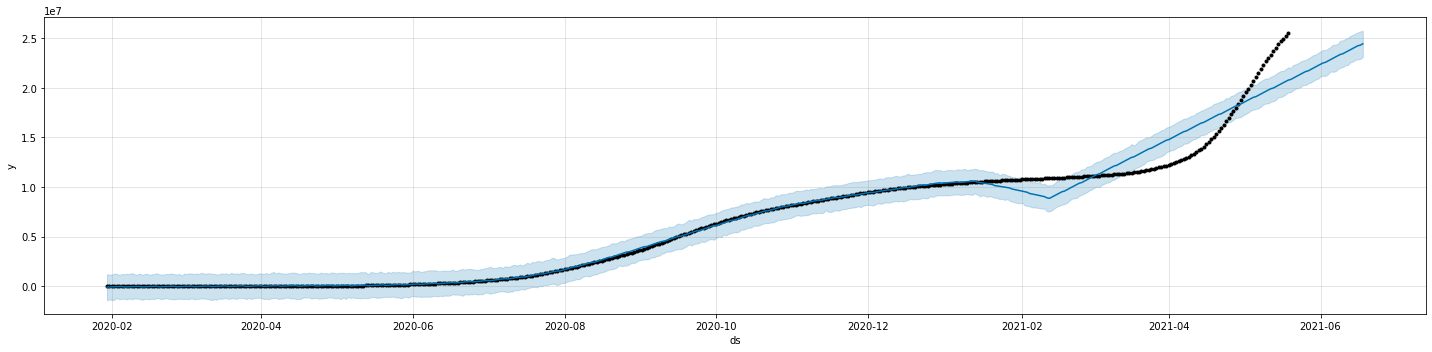

In [64]:
#This forecast is for the total amount of covid cases in india for the nxt 30 days. (cumulative data as per dataset) 
main_model=Prophet(changepoint_prior_scale=0.2)
main_model.fit(new_df)
data_set=main_model.make_future_dataframe(periods=30,freq='D')
main1_forecast=main_model.predict(data_set)
main_forecast_df=main1_forecast[['yhat','yhat_lower','yhat_upper','trend','ds']]
main_model.plot(main1_forecast,figsize=(20,5));

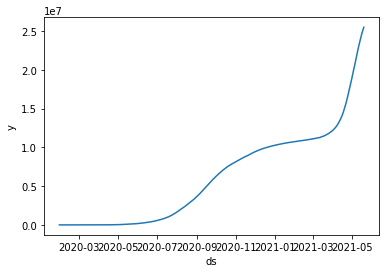

In [65]:
sns.lineplot(x=new_df['ds'],y=new_df['y'],data=new_df)

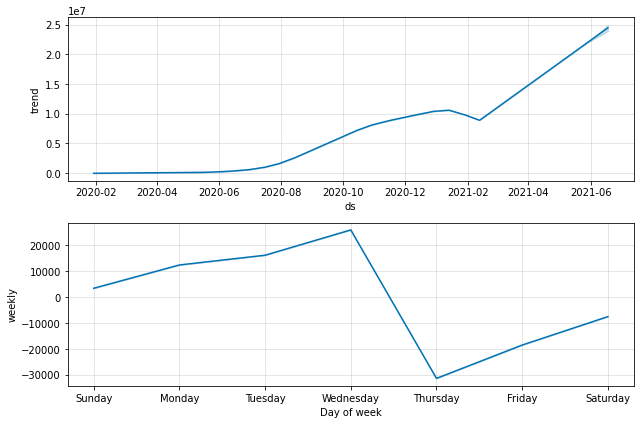

In [66]:
plot_1=main_model.plot_components(main1_forecast)

In [67]:
df1.head()

,date,state,cured,deaths,total_conf
0,2020-01-30,Kerala,0.0,0.0,1.0
1,2020-01-31,Kerala,0.0,0.0,1.0
2,2020-02-01,Kerala,0.0,0.0,2.0
3,2020-02-02,Kerala,0.0,0.0,3.0
4,2020-02-03,Kerala,0.0,0.0,3.0


In [68]:
#test=df1's copy

In [69]:
test_df.drop(columns=['conf_indian_national','conf_foreign_national','sno'],inplace=True)
test_df.head()

,date,time,state,cured,deaths,total_conf
0,2020-01-30,6:00 PM,Kerala,0.0,0.0,1.0
1,2020-01-31,6:00 PM,Kerala,0.0,0.0,1.0
2,2020-02-01,6:00 PM,Kerala,0.0,0.0,2.0
3,2020-02-02,6:00 PM,Kerala,0.0,0.0,3.0
4,2020-02-03,6:00 PM,Kerala,0.0,0.0,3.0


In [70]:
test_df['date']=test_df['date'].astype(str)
test_df['time']=test_df['time'].astype(str)
test_df['ds'] = test_df[['date', 'time']].apply(lambda x: ' '.join(x), axis = 1)

test_df.head()

,date,time,state,cured,deaths,total_conf,ds
0,2020-01-30,6:00 PM,Kerala,0.0,0.0,1.0,2020-01-30 6:00 PM
1,2020-01-31,6:00 PM,Kerala,0.0,0.0,1.0,2020-01-31 6:00 PM
2,2020-02-01,6:00 PM,Kerala,0.0,0.0,2.0,2020-02-01 6:00 PM
3,2020-02-02,6:00 PM,Kerala,0.0,0.0,3.0,2020-02-02 6:00 PM
4,2020-02-03,6:00 PM,Kerala,0.0,0.0,3.0,2020-02-03 6:00 PM


In [71]:
test_df['ds'].nunique()



477

In [72]:
test_df.isnull().sum()

date           0
time           0
state         28
cured         28
deaths        28
total_conf    28
ds             0
dtype: int64

In [73]:
test111=test_df.dropna(how='any')

In [74]:
test111.isnull().sum()

date          0
time          0
state         0
cured         0
deaths        0
total_conf    0
ds            0
dtype: int64

In [75]:
test111.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15086 entries, 0 to 15085
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        15086 non-null  object 
 1   time        15086 non-null  object 
 2   state       15086 non-null  object 
 3   cured       15086 non-null  float64
 4   deaths      15086 non-null  float64
 5   total_conf  15086 non-null  float64
 6   ds          15086 non-null  object 
dtypes: float64(3), object(4)
memory usage: 942.9+ KB


In [76]:
test111['ds'].unique()[:10]

array(['2020-01-30 6:00 PM', '2020-01-31 6:00 PM', '2020-02-01 6:00 PM',
       '2020-02-02 6:00 PM', '2020-02-03 6:00 PM', '2020-02-04 6:00 PM',
       '2020-02-05 6:00 PM', '2020-02-06 6:00 PM', '2020-02-07 6:00 PM',
       '2020-02-08 6:00 PM'], dtype=object)

In [77]:
hh=list(test111['state'].unique())
ee=list()
for f in hh:
  yy=test111[test111['state']==f]['total_conf'].tail(1).values[0]
  ee.append(yy)
gg=zip(hh,ee)
fg=dict(gg)
new_state=pd.DataFrame(data=list(fg.items()),columns = ['state','confirmed_cases'])
new_state.head()

,state,confirmed_cases
0,Kerala,2200706.0
1,Telengana,443360.0
2,Delhi,1402873.0
3,Rajasthan,879664.0
4,Uttar Pradesh,1637663.0


In [78]:
## alternative way 
fff=test111.groupby(['state'])[['state','total_conf']].tail(1)
fff.head()

,state,total_conf
617,Unassigned,77.0
2890,Daman & Diu,2.0
4250,Cases being reassigned to states,163.0
14433,Telengana,443360.0
15050,Andaman and Nicobar Islands,6674.0


In [79]:
new_state['confirmed_cases']=new_state['confirmed_cases'].astype(int)

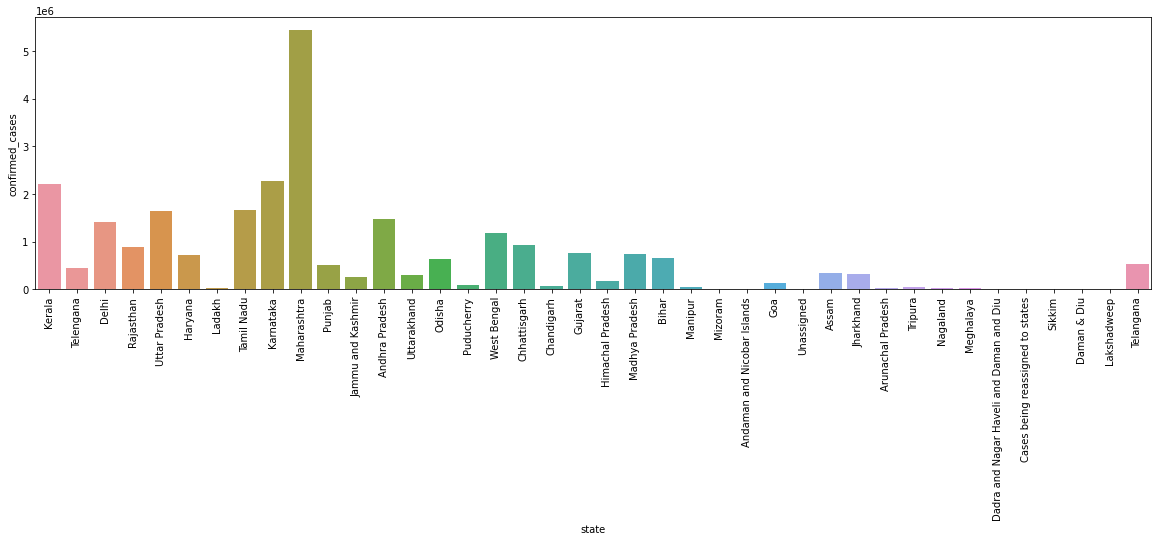

In [80]:
#this graph shows the active covid confirmed cases wrt to each state.
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,5))
qqq=sns.barplot(x=new_state['state'],y=new_state['confirmed_cases'],data=new_state,ax=ax)
qqq.set_xticklabels(labels=new_state['state'], rotation=90)
# Show the plot
plt.show()
